In [ ]:
# install kaggle to get the dataset
!pip install kaggle

In [ ]:
#Configuring path of kaggle.json file as my credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the dog bv cat Dataset from kaggle


In [ ]:
#Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:03<00:00, 117MB/s]
100% 812M/812M [00:03<00:00, 269MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# Extracting the compressed zip file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip' #Path of the dataset

with ZipFile(dataset , 'r') as zip: #'r' read the zipefiles
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
# Extracting the compressed zip file
#Extract the training dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
#os.walk = (cuurent_directory_path, list_of_subdirectories, Files_in_the_directory)
file_count = len(files)
print("NUmber of image in train directory is", file_count)

NUmber of image in train directory is 25000


Printing the Name of the images

In [ ]:
Files_names = os.listdir('/content/train')
print(Files_names)

['dog.4176.jpg', 'cat.9284.jpg', 'cat.11243.jpg', 'cat.8250.jpg', 'cat.5831.jpg', 'dog.10057.jpg', 'cat.543.jpg', 'cat.1091.jpg', 'cat.4358.jpg', 'dog.3890.jpg', 'dog.6204.jpg', 'cat.7640.jpg', 'dog.11550.jpg', 'dog.7280.jpg', 'dog.12497.jpg', 'cat.10771.jpg', 'dog.10665.jpg', 'dog.5956.jpg', 'cat.11960.jpg', 'dog.9521.jpg', 'dog.3599.jpg', 'cat.1214.jpg', 'cat.5349.jpg', 'dog.8921.jpg', 'cat.6396.jpg', 'cat.11890.jpg', 'cat.12056.jpg', 'cat.11534.jpg', 'dog.8829.jpg', 'cat.10214.jpg', 'cat.532.jpg', 'cat.10568.jpg', 'dog.5378.jpg', 'cat.10680.jpg', 'dog.4820.jpg', 'dog.12101.jpg', 'cat.9774.jpg', 'cat.373.jpg', 'cat.10195.jpg', 'cat.10467.jpg', 'cat.3578.jpg', 'dog.650.jpg', 'cat.618.jpg', 'dog.7177.jpg', 'dog.5597.jpg', 'dog.3557.jpg', 'dog.2019.jpg', 'cat.7543.jpg', 'dog.7045.jpg', 'dog.3258.jpg', 'dog.1633.jpg', 'cat.8221.jpg', 'dog.12256.jpg', 'cat.10345.jpg', 'dog.343.jpg', 'cat.1793.jpg', 'dog.10392.jpg', 'dog.6513.jpg', 'dog.6558.jpg', 'cat.784.jpg', 'cat.3594.jpg', 'dog.964.jp

Importing the dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images

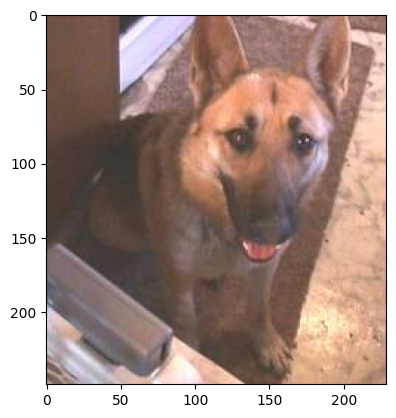

In [ ]:
# Display dog images

img = mpimg.imread('/content/train/dog.4185.jpg')
imgplot = plt.imshow(img)
imgplot

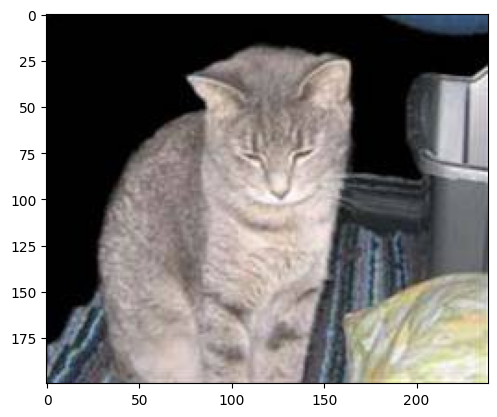

In [ ]:
# Display image of the cat
img  = mpimg.imread('/content/train/cat.1735.jpg')
imgplot = plt.imshow(img)
imgplot

In [ ]:
file_names = os.listdir('/content/train/')
for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
cat
cat
cat
cat


In [ ]:
file_names = os.listdir('/content/train/')
count_dog=0;
count_cat=0;
for img_files in file_names:
  name = img_files[0:3]
  if(name == 'dog'):
      count_dog+=1
  else:
      count_cat+=1
print("Number of dog images are", count_dog)
print("Number of cat images are", count_cat)

Number of dog images are 12500
Number of cat images are 12500


YOU CAN SEE THAT THE IMAGES ARE OF DIFFERENT SIZE--- SO WE HAVE TO RESIZE THE IMAGES TO SAME IMAGE SIZE

In [ ]:
#Creating a new directory for the resized images
os.mkdir('/content/image_resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):

  file_name = os.listdir(original_folder)[i]
  img_path = original_folder+file_name

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert("RGB")

  newImgPath = resized_folder+file_name

  img.save(newImgPath)

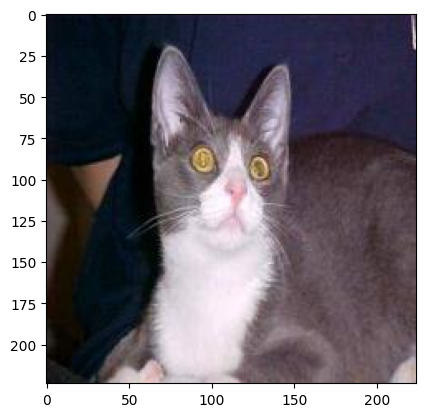

In [ ]:
img  = mpimg.imread('/content/image_resized/cat.9284.jpg')
imgplot = plt.imshow(img)
imgplot

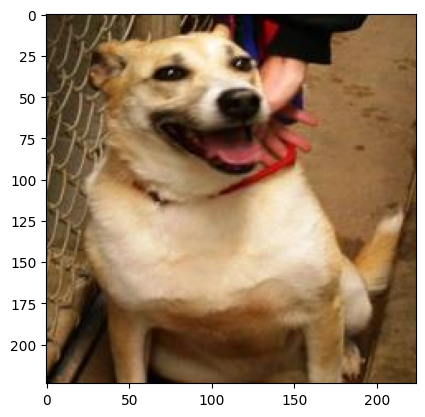

In [ ]:

img = mpimg.imread('/content/image_resized/dog.4176.jpg')
imgplot = plt.imshow(img)
imgplot

**Creating Label for resized Images for dogs and Cats**

Cat-->0

Dog-->1

In [ ]:
# Creating a for loop to assing labels
file_names = os.listdir('/content/image_resized')
labels= []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if(label== "dog"):
    labels.append(1)
  else:
    labels.append(0)

file_names[0:5]

['dog.4176.jpg',
 'cat.9284.jpg',
 'cat.11243.jpg',
 'cat.8250.jpg',
 'cat.5831.jpg']

In [ ]:
labels[0:5]

[1, 0, 0, 0, 0]

In [ ]:
dogs=0
cats=0;
for i in range(len(labels)):
  if(labels[i]==1):
    dogs+=1
  else:
    cats+=1
print("Number of dog images are", dogs)
print("Number of cat images are", cats)
print(len(labels))

Number of dog images are 998
Number of cat images are 1002
2000


In [ ]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1002  998]


Converting all the resized images to numpy array

In [ ]:
import cv2 #OpenCV
import glob #Global pattern matching
#Glob- only working with files and path to match a pattern

In [ ]:
image_directory = '/content/image_resized/'
image_extension = ['png','jpg']
files = []

[files.extend(glob.glob(image_directory+ '*.'+ e )) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 29  47  58]
   [ 30  48  59]
   [ 32  49  62]
   ...
   [ 60  92 127]
   [ 61  93 128]
   [ 63  95 130]]

  [[ 25  43  54]
   [ 27  45  56]
   [ 29  46  59]
   ...
   [ 60  92 127]
   [ 62  94 129]
   [ 64  96 131]]

  [[ 21  39  50]
   [ 23  41  52]
   [ 25  42  55]
   ...
   [ 61  93 128]
   [ 64  96 131]
   [ 66  98 133]]

  ...

  [[ 16  13  15]
   [  8   7  11]
   [  3   7  12]
   ...
   [ 33  66  92]
   [ 33  66  92]
   [ 33  66  92]]

  [[ 20  15  16]
   [ 14  11  13]
   [ 11  14  18]
   ...
   [ 28  62  86]
   [ 31  65  89]
   [ 34  68  92]]

  [[ 10   5   4]
   [  7   5   5]
   [ 13  14  18]
   ...
   [ 24  58  82]
   [ 31  65  89]
   [ 37  71  95]]]


 [[[ 29  17  17]
   [ 30  18  18]
   [ 30  18  16]
   ...
   [153 128 142]
   [128 107 122]
   [ 94  77  91]]

  [[ 28  16  16]
   [ 29  17  17]
   [ 29  17  15]
   ...
   [150 125 139]
   [132 111 126]
   [ 88  71  85]]

  [[ 27  15  13]
   [ 27  15  13]
   [ 28  16  14]
   ...
   [146 121 135]
   [141 120 135]
   [ 84  67

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)
#There are 2000 images with each as 224 =*244 and 3 means it is rgb value

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)
Y

array([1, 0, 0, ..., 0, 0, 1])

# **Train Test Split **

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state =2)
#20% are test data and 80% will be in train
#random_state, anytime u run this line the same data with be in reain and test if u dont put thisd line then whenever u run this line a different data with be in train and test

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
#1600 --> train images

#400 ----> test_images

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
#Scalling the data
#To make all the images to be in range of 0 to 1 as all the images pixel value are between 0 and 255
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.14509804, 0.11764706, 0.14509804],
         [0.14509804, 0.11764706, 0.14509804],
         [0.14509804, 0.11764706, 0.14509804],
         ...,
         [0.1372549 , 0.15294118, 0.17254902],
         [0.14117647, 0.15686275, 0.17647059],
         [0.14509804, 0.16078431, 0.18039216]],

        [[0.14117647, 0.11372549, 0.14117647],
         [0.14117647, 0.11372549, 0.14117647],
         [0.14117647, 0.11372549, 0.14117647],
         ...,
         [0.16470588, 0.18039216, 0.2       ],
         [0.16862745, 0.18431373, 0.20392157],
         [0.16862745, 0.18431373, 0.20392157]],

        [[0.1372549 , 0.10980392, 0.1372549 ],
         [0.1372549 , 0.10980392, 0.1372549 ],
         [0.1372549 , 0.10980392, 0.1372549 ],
         ...,
         [0.18431373, 0.2       , 0.21960784],
         [0.18823529, 0.20392157, 0.22352941],
         [0.19215686, 0.20784314, 0.22745098]],

        ...,

        [[0.40784314, 0.45882353, 0.51372549],
         [0.41176471, 0.4627451 , 0.51764706]

**BUILDING THE NEURAL NETWORK**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import regularizers

In [ ]:
# mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
# #

# pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable= False)
mobilenet = MobileNetV2(include_top= False, input_shape=(224,224,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# num_of_classes = 2

# model = tf.keras.Sequential([
#     pretrained_model,
#     tf.keras.layers.Dense(num_of_classes)
# ])

# model.summary()
# for layer in mobilenet.layers:
#   print(layer)

In [ ]:
len(mobilenet.layers)

154

In [ ]:
x = Flatten()(mobilenet.output)

In [ ]:
output = Dense(1,
               activation = 'sigmoid',
               kernel_regularizer = tf.keras.regularizers.l2(0.0001)
               )(x)

In [ ]:
model = Model(mobilenet.input,output)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,320,705 (8.85 MB)

 Trainable params: 2,286,593 (8.72 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min',restore_best_weights = True)
model.compile(
    optimizer = opt,
    loss = tf.keras.losses.BinaryCrossentropy(from_logits= False),
    metrics = ['accuracy']
)
Model_fit = model.fit(X_train_scaled,Y_train ,epochs=5,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 337s 7s/step - accuracy: 0.7949 - loss: 0.4503 - val_accuracy: 0.9531 - val_loss: 0.1473
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 319s 7s/step - accuracy: 0.9887 - loss: 0.0264 - val_accuracy: 0.9531 - val_loss: 0.1385
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 322s 7s/step - accuracy: 0.9942 - loss: 0.0113 - val_accuracy: 0.9656 - val_loss: 0.0819
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 340s 8s/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9594 - val_loss: 0.1279


Text(0, 0.5, 'Accuracy')

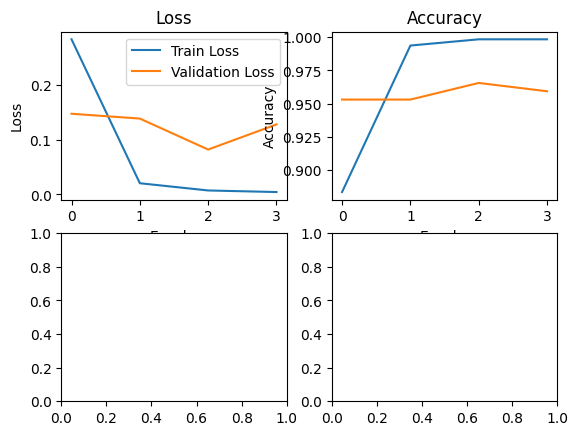

In [ ]:
import matplotlib.pyplot as plt
fig,plots = plt.subplots(2,2)
history = Model_fit.history
plots[0,0].plot(history['loss'], label = 'Train Loss')
plots[0,0].plot(history['val_loss'], label = 'Validation Loss')
plots[0,0].set_title('Loss')
plots[0,0].set_xlabel('Epochs')
plots[0,0].set_ylabel('Loss')
plots[0,0].legend()

plots[0,1].plot(history['accuracy'], label = 'Trian Accuracy')
plots[0,1].plot(history['val_accuracy'], label = 'Validation Accuracy')
plots[0,1].set_title('Accuracy')
plots[0,1].set_xlabel('Epochs')
plots[0,1].set_ylabel('Accuracy')

In [ ]:
# model.fit(X_train_scaled,Y_train,epochs = 5)

In [ ]:
score, acc = model.evaluate(X_test_scaled,Y_test)
print('Test Loss = ',score)
print('Test Accuracy = ',acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9689 - loss: 0.1412
Test Loss =  0.13656073808670044
Test Accuracy =  0.9649999737739563


**Predictive System**

Path of the image to be predicted :/content/dog.png


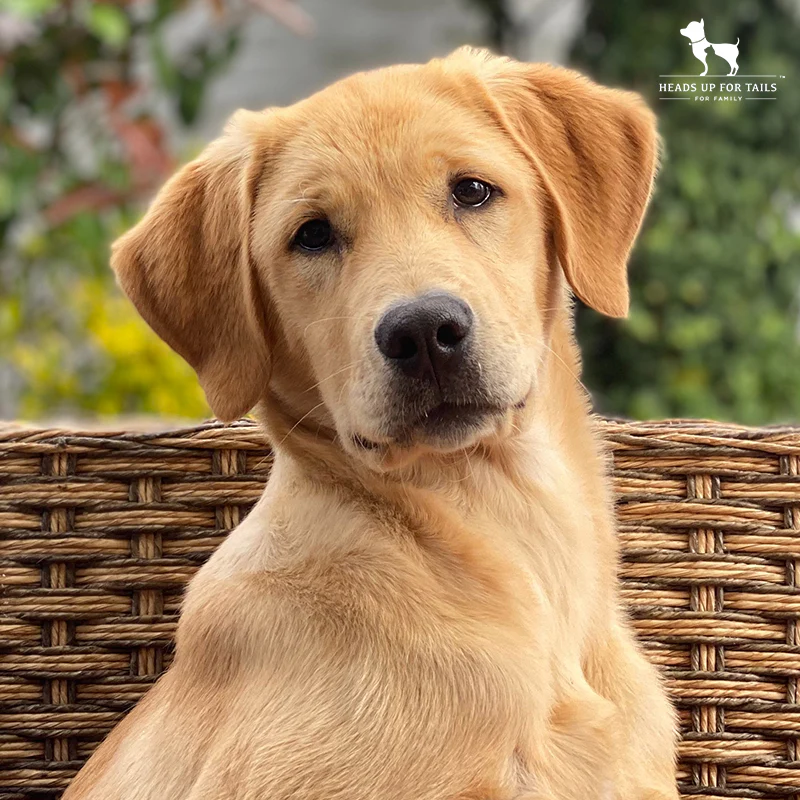

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.]]
Image is of dog


In [ ]:
input_image_path = input('Path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image , (224,224))

input_image_scaled = input_image_resized/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)
input_prediction
# model.predict gives the percentage of being a cat and dog
print(input_prediction)
if(input_prediction[0][0]>0.5):
  input_pred_label = 1
  print("Image is of dog")
else:
  input_pred_label = 0
  print("Image is of cat")
#argmax gives which probability is higher and gives the output

In [ ]:
model.save("DogCatClassifies.keras")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')